In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = load_model('/content/drive/MyDrive/Model_Image/model_conv.h5')

In [4]:
# Pre-processing for test images
def test_preprocessing(img_path, gray=False):
    image = cv2.imread(img_path)
    if gray:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

In [5]:
import io
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

def visualize_image(image, y_pred):
    # Do the actual drawing in python
    fig = plt.figure(figsize=(3, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
    if y_pred < 0.5:
      ax.text(2, 8, "Male",fontweight='bold', color='green',  bbox = dict(facecolor = 'gold', alpha =.9), fontsize='large')
    else:
      ax.text(0, 10, "Female",fontweight='bold', color='red',  bbox = dict(facecolor = 'gold', alpha =.9), fontsize='large')
    fig.canvas.draw()
    plt.tight_layout()

In [6]:
def inference(image_path):
  # read the test image
  img = cv2.imread(test_img_path)

  # Pre-processing
  test_image = test_preprocessing(test_img_path)
  # prediction
  y_pred = model.predict(test_image, verbose=0)[0][0]

  # print(y_pred)
  visualize_image(img, y_pred)

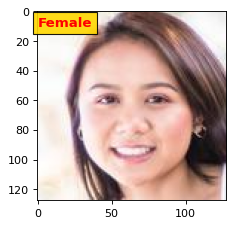

In [7]:
# test image path
test_img_path = '4.jpg'
inference(test_img_path)